## References
 - __[Script: Kaggle](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook)__
 - __[Dataset: Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)__

In [3]:
# Importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [4]:
# Operating system
print(os.listdir(".."))
print(os.listdir("../Python/Input"))
for dirname, _, filenames in os.walk('../Python/Input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Read datasets
df = pd.read_csv('../Python/Input/netflix_titles.csv')

df.head(3)

['.ipynb_checkpoints', 'Others', 'Python', 'SQL']
['netflix_titles.csv']
../Python/Input\netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Dealing with Missing Data
- Countries: replace missing with mode (most common) country
- Casts/Directors: Keep missing
- Date Added/Rating: Drop missing

In [6]:
# Missing Data High Level Summary
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("null rate, {}: {}%".format(i,round(null_rate,2)))

null rate, director: 29.91%
null rate, cast: 9.37%
null rate, country: 9.44%
null rate, date_added: 0.11%
null rate, rating: 0.05%
null rate, duration: 0.03%


In [7]:
# Countries: replace missing with mode (most common) country
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Directors/Casts: Keep missing
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Date Added/Rating: Drop missing
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Sanity Check: Check datasets for nulls
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [8]:
# Correcting Datatype for Date
df["date_added"]   = pd.to_datetime(df['date_added'],format="mixed")  # Issue: inconsistent formatting of date. Dealt with "mixed"
df["release_year"] = pd.to_datetime(df['release_year'],format="%Y")

# Extract Months and Years
df['month_added']      = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added']       = df['date_added'].dt.year

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   datetime64[ns]
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  month_added       8790 non-null   int32         
 13  month_name_added  8790 non-null   object        
 14  year_added        8790 non-nu

## Netflix Color Palette

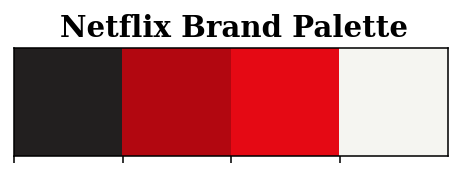

In [10]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

# Plot
plt.title("Netflix Brand Palette ",loc='left',fontfamily='serif',fontsize=15,y=1,x=0.105,fontweight='bold')
plt.show()

## Netflix History

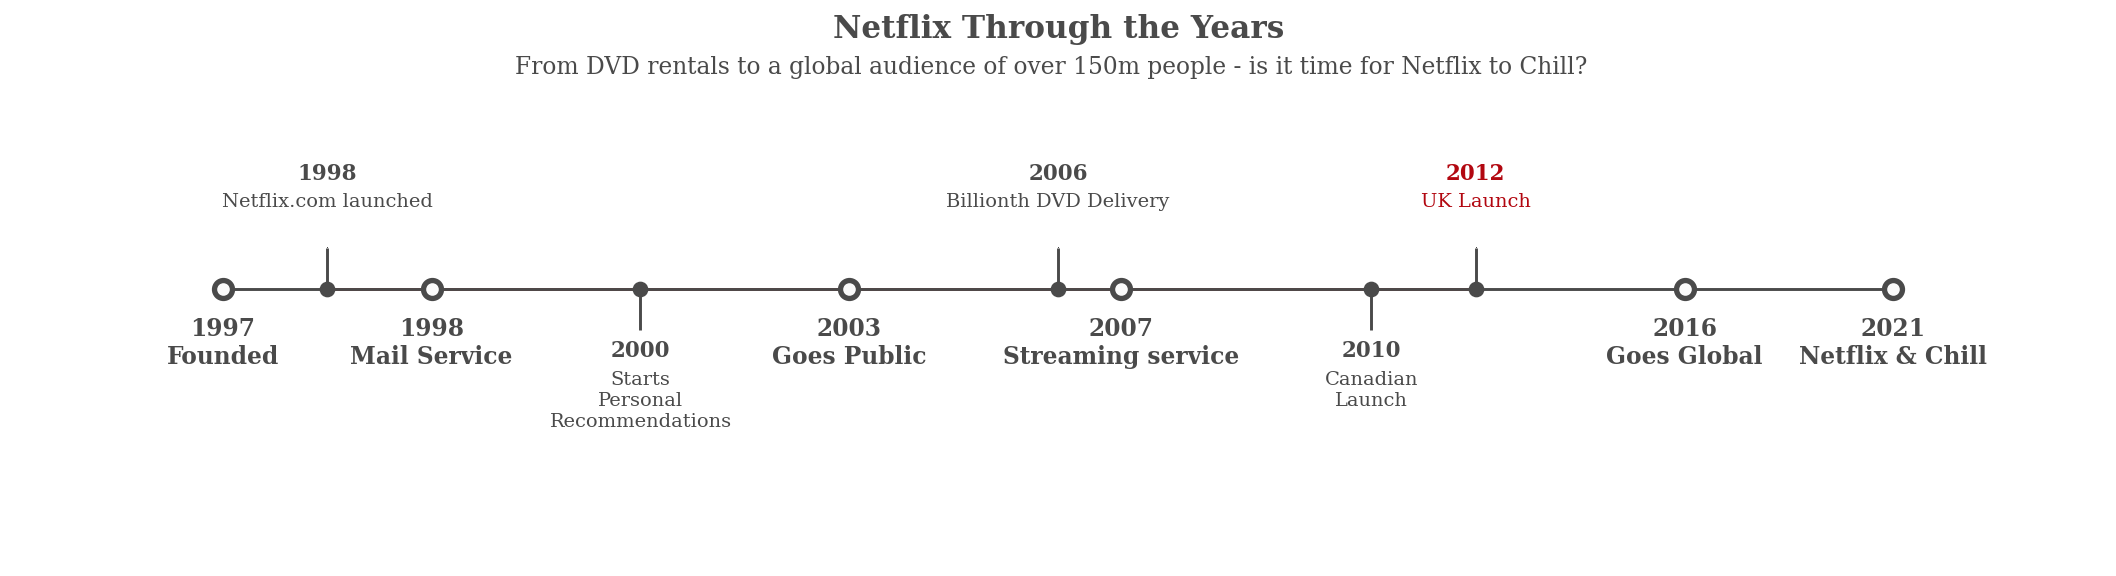

In [12]:
# Timeline, Main
tl_dates = ["1997\nFounded",
            "1998\nMail Service",
            "2003\nGoes Public",
            "2007\nStreaming service",
            "2016\nGoes Global",
            "2021\nNetflix & Chill"]
tl_x     = [1, 2, 4, 5.3, 8,9]

# Timeline, Sub
tl_sub_times = ["1998","2000","2006","2010","2012"]
tl_text      = ["Netflix.com launched",
                "Starts\nPersonal\nRecommendations",
                "Billionth DVD Delivery",
                "Canadian\nLaunch",
                "UK Launch\n"]
tl_sub_x     = [1.5,3,5,6.5,7]

# Set Figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Main Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30,  c='#fafafa', zorder=3)

# Timeline : Sub Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# ext: Date
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels,linefmt ='-')    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix Through the Years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

# Plot
plt.show()


## Netflix by Type

In [14]:
# Ratio of Movies & TV shows
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

# Convert to pd DataFrame & Transpose
mf_ratio = pd.DataFrame(r).T
print(mf_ratio)

type  Movie  TV Show
type    0.7      0.3


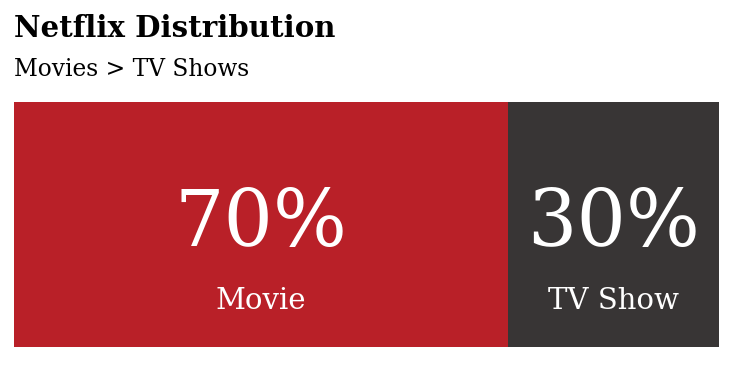

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9)
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9)

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
# show percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Netflix Distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'Movies > TV Shows',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
plt.show()

## Netflix by County
- Issue: Many productions have several countries listed - this will skew our results , we'll grab the first country mentioned
- Solution: Feature engineering

In [17]:
# Helper column for various plots
df['count'] = 1

# Retrieve the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
# df['first_country'].head()

# Rename TV rating
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
# df['target_ages'].unique()

# Genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Shorten country name
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

# Interested data
data = df.groupby(['first_country'])['count'].sum().sort_values(ascending=False)[:10]
data.head()

first_country
USA       4031
India     1008
UK         627
Canada     271
Japan      257
Name: count, dtype: int64

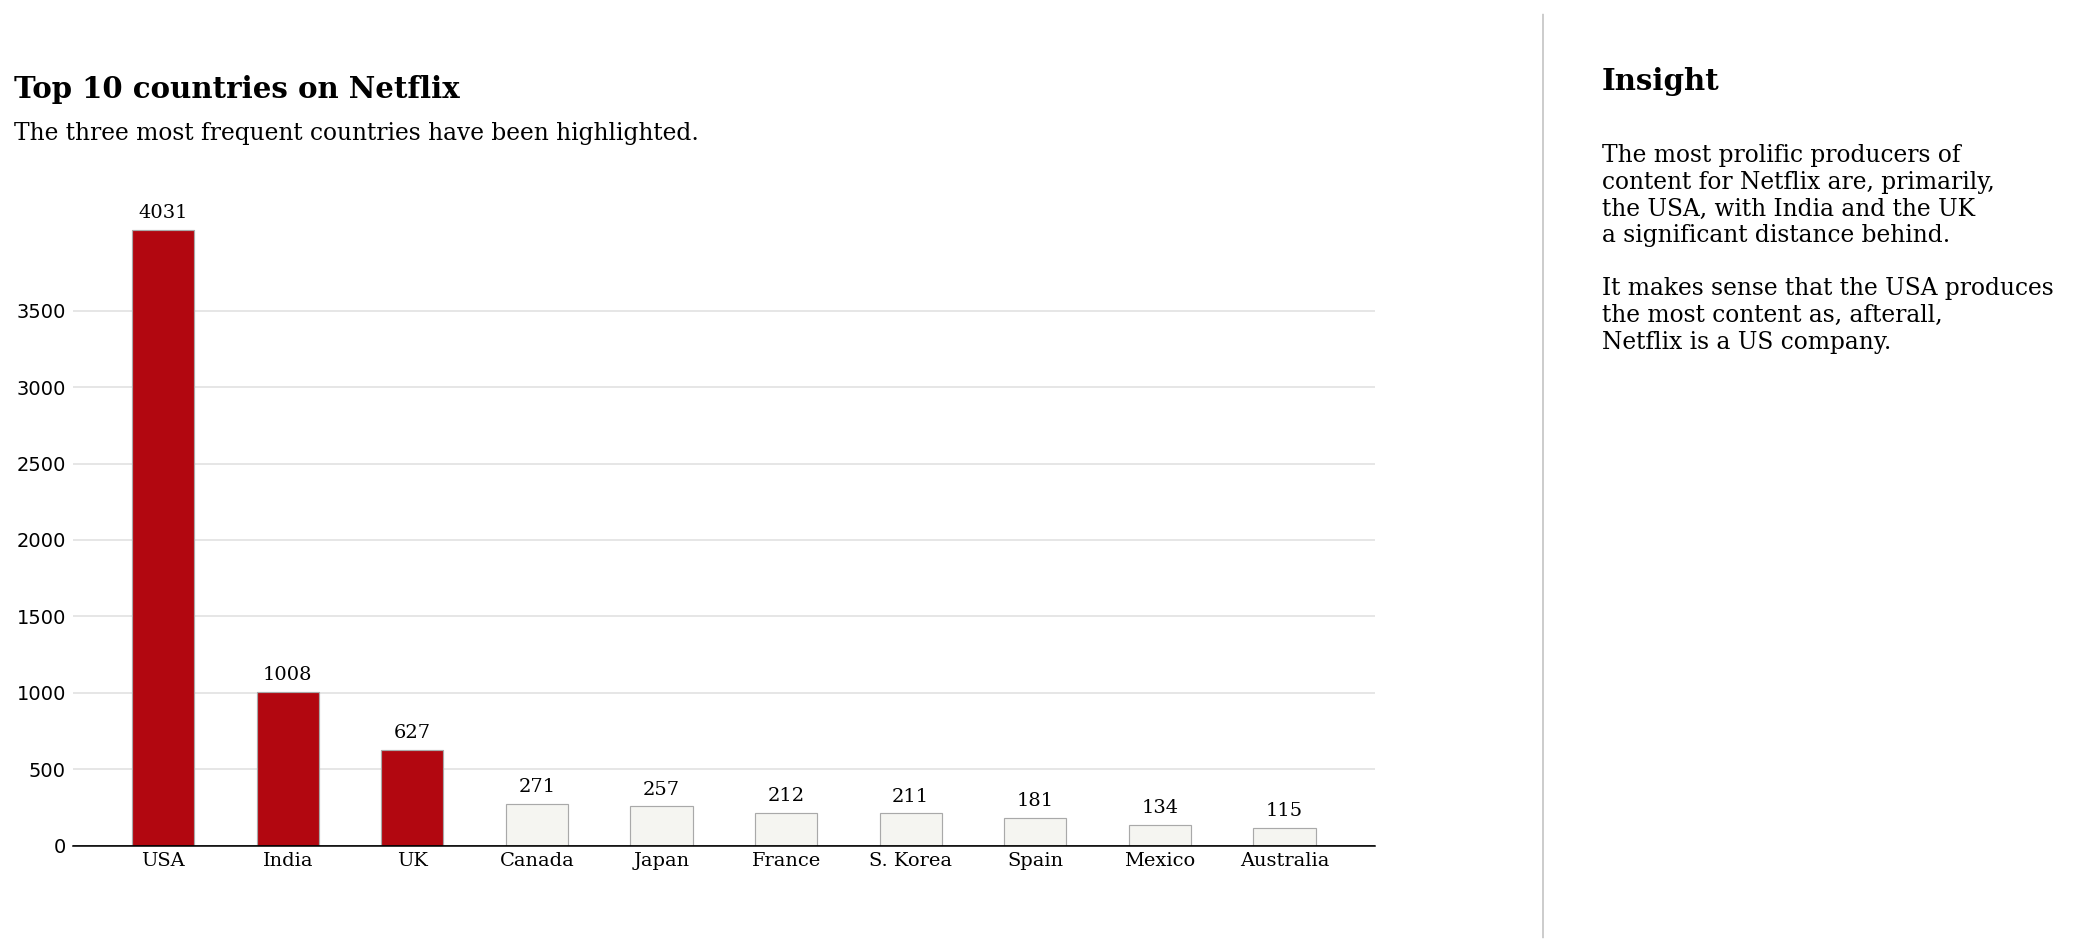

In [18]:
# Colors
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

# Plot
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 110),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(1.035, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1, 0.67, '''
        The most prolific producers of
        content for Netflix are, primarily,
        the USA, with India and the UK
        a significant distance behind.
        
        It makes sense that the USA produces 
        the most content as, afterall, 
        Netflix is a US company.
        '''
         ,fontsize=12, fontweight='light', fontfamily='serif')

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.4)   
grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# Axis labels
# plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
# plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
# plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
# ax.tick_params(axis='both', which='major', labelsize=12)

# vertical line 
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1.1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

# ticks parameters
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Content Variation by Country

In [20]:
country_order    = df['first_country'].value_counts()[:11].index
data_q2q3        = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio  = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# print(data_q2q3.T)
# print(data_q2q3['sum'])
print(data_q2q3_ratio)

type              Movie   TV Show
first_country                    
S. Korea       0.222749  0.777251
Japan          0.330739  0.669261
Australia      0.530435  0.469565
UK             0.609250  0.390750
Mexico         0.641791  0.358209
Canada         0.690037  0.309963
USA            0.694617  0.305383
France         0.698113  0.301887
Spain          0.712707  0.287293
Egypt          0.875000  0.125000
India          0.919643  0.080357


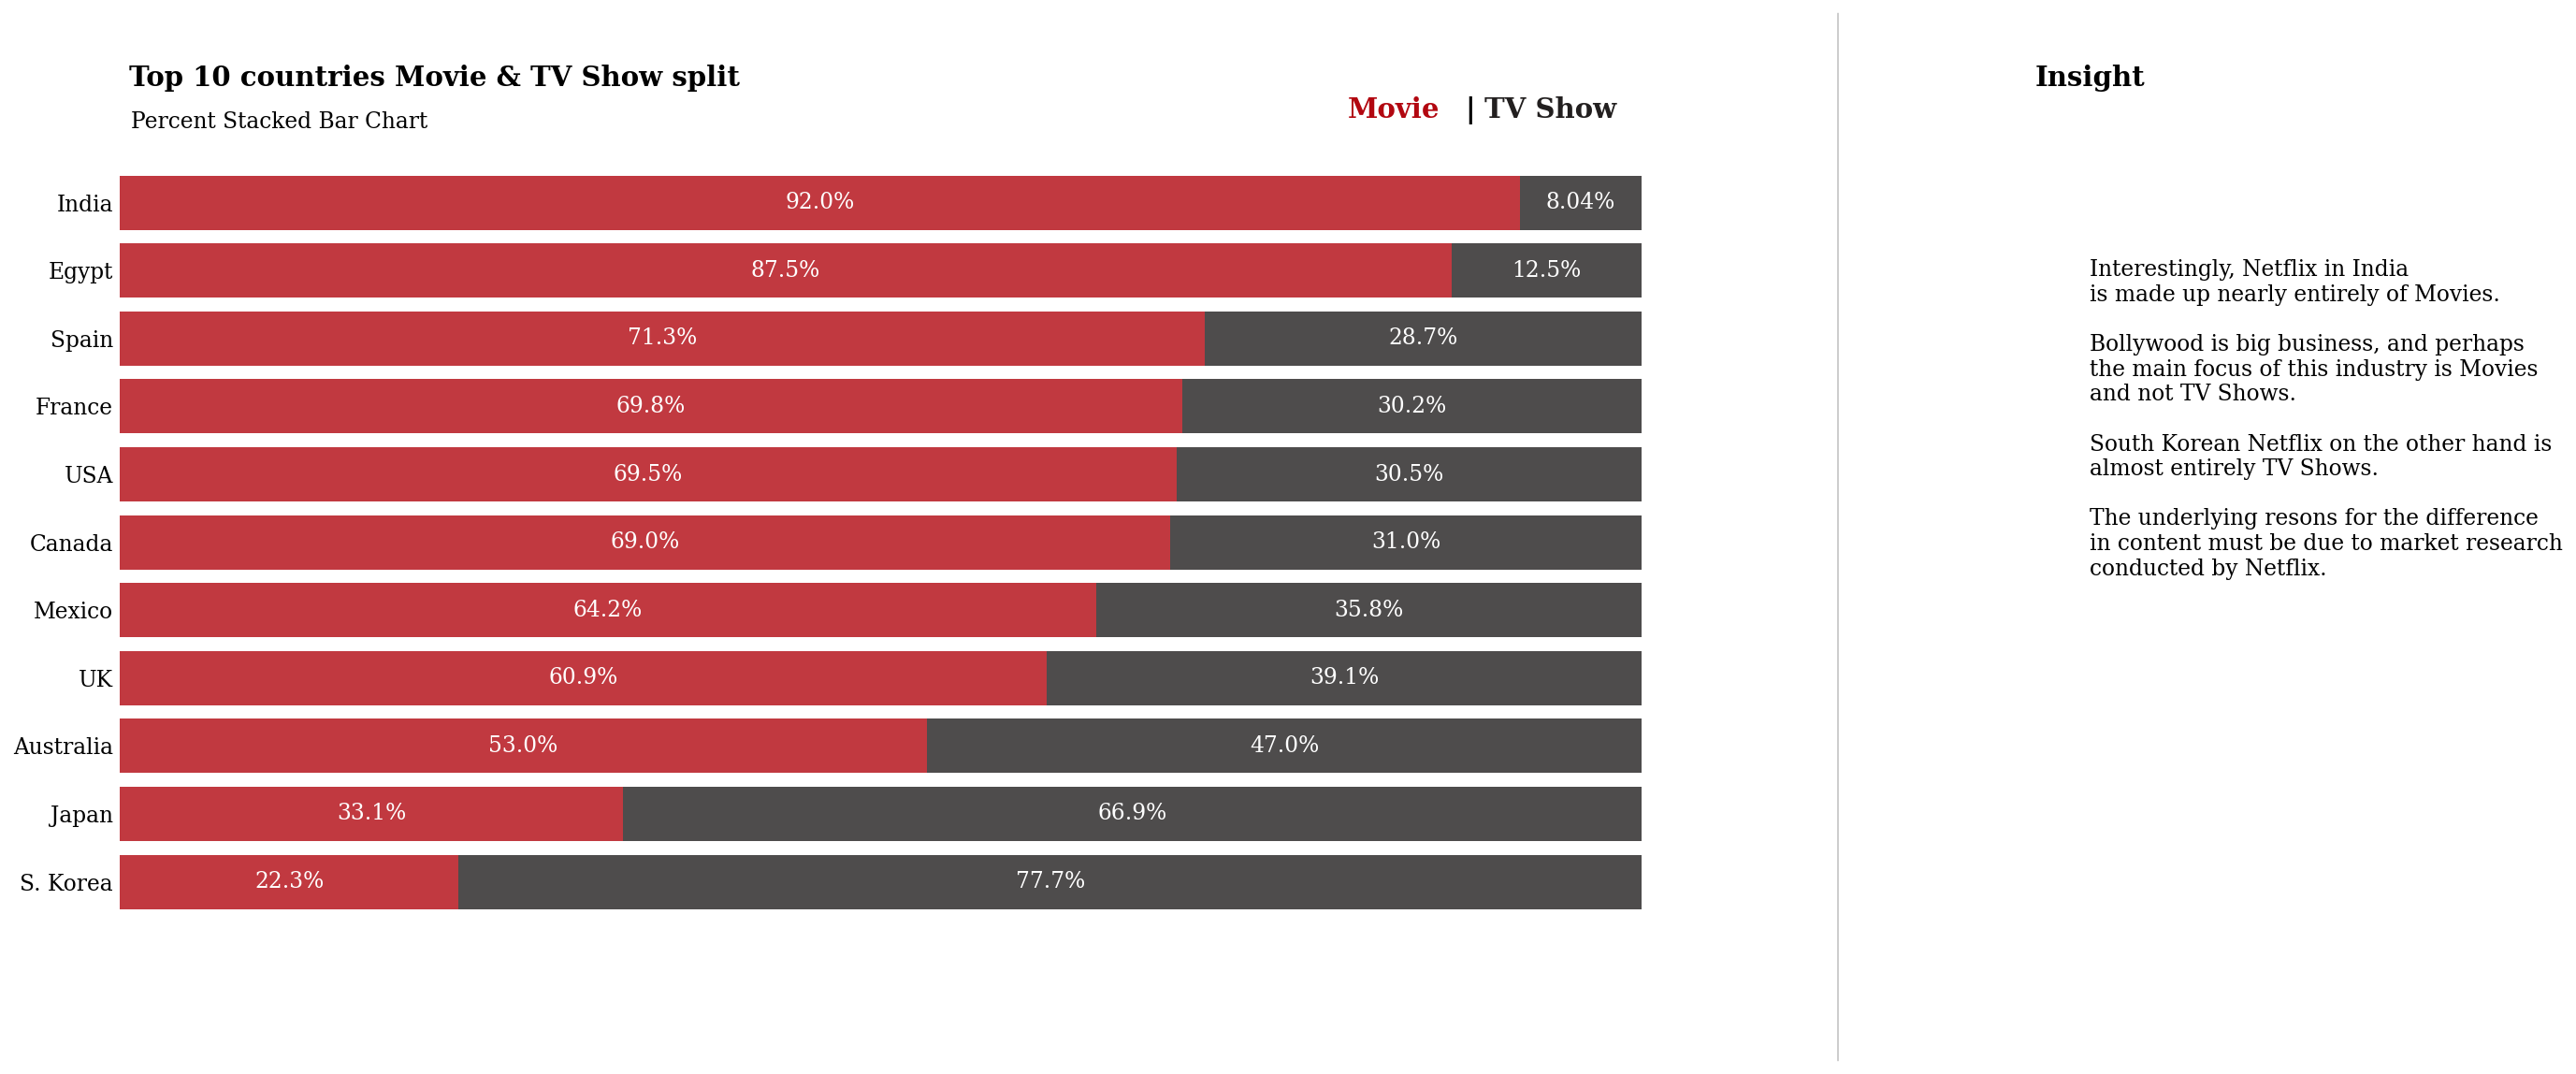

In [21]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# Percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
# Text
fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   
fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.44, '''
        Interestingly, Netflix in India
        is made up nearly entirely of Movies. 
        
        Bollywood is big business, and perhaps
        the main focus of this industry is Movies
        and not TV Shows.
        
        South Korean Netflix on the other hand is 
        almost entirely TV Shows.
        
        The underlying resons for the difference 
        in content must be due to market research
        conducted by Netflix.
        '''
         , fontsize=12, fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

### Note
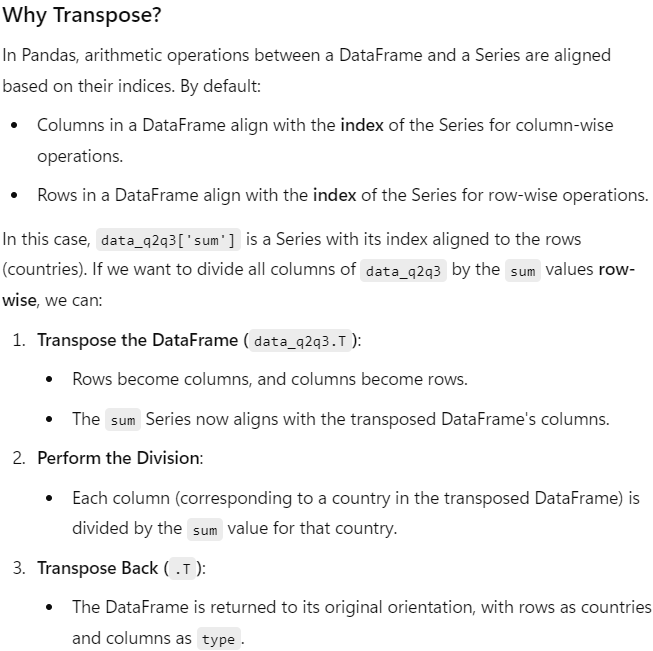

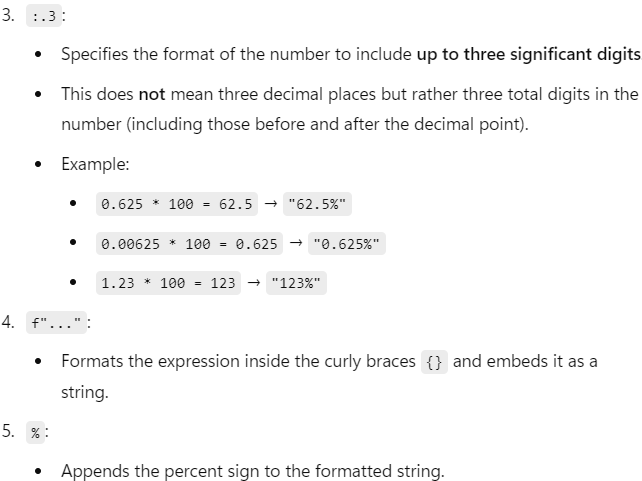

## Rating Distribution by Type

In [24]:
data  = df[['rating','type']].groupby('rating')['type'].value_counts().unstack().sort_values(by='Movie',ascending=False).fillna(0)
movie = data['Movie']
tv    = -data['TV Show']

print(data)

type       Movie  TV Show
rating                   
TV-MA     2062.0   1143.0
TV-14     1427.0    730.0
R          797.0      2.0
TV-PG      540.0    321.0
PG-13      490.0      0.0
PG         287.0      0.0
TV-Y7      139.0    194.0
TV-Y       131.0    175.0
TV-G       126.0     94.0
NR          75.0      4.0
G           41.0      0.0
TV-Y7-FV     5.0      1.0
NC-17        3.0      0.0
UR           3.0      0.0


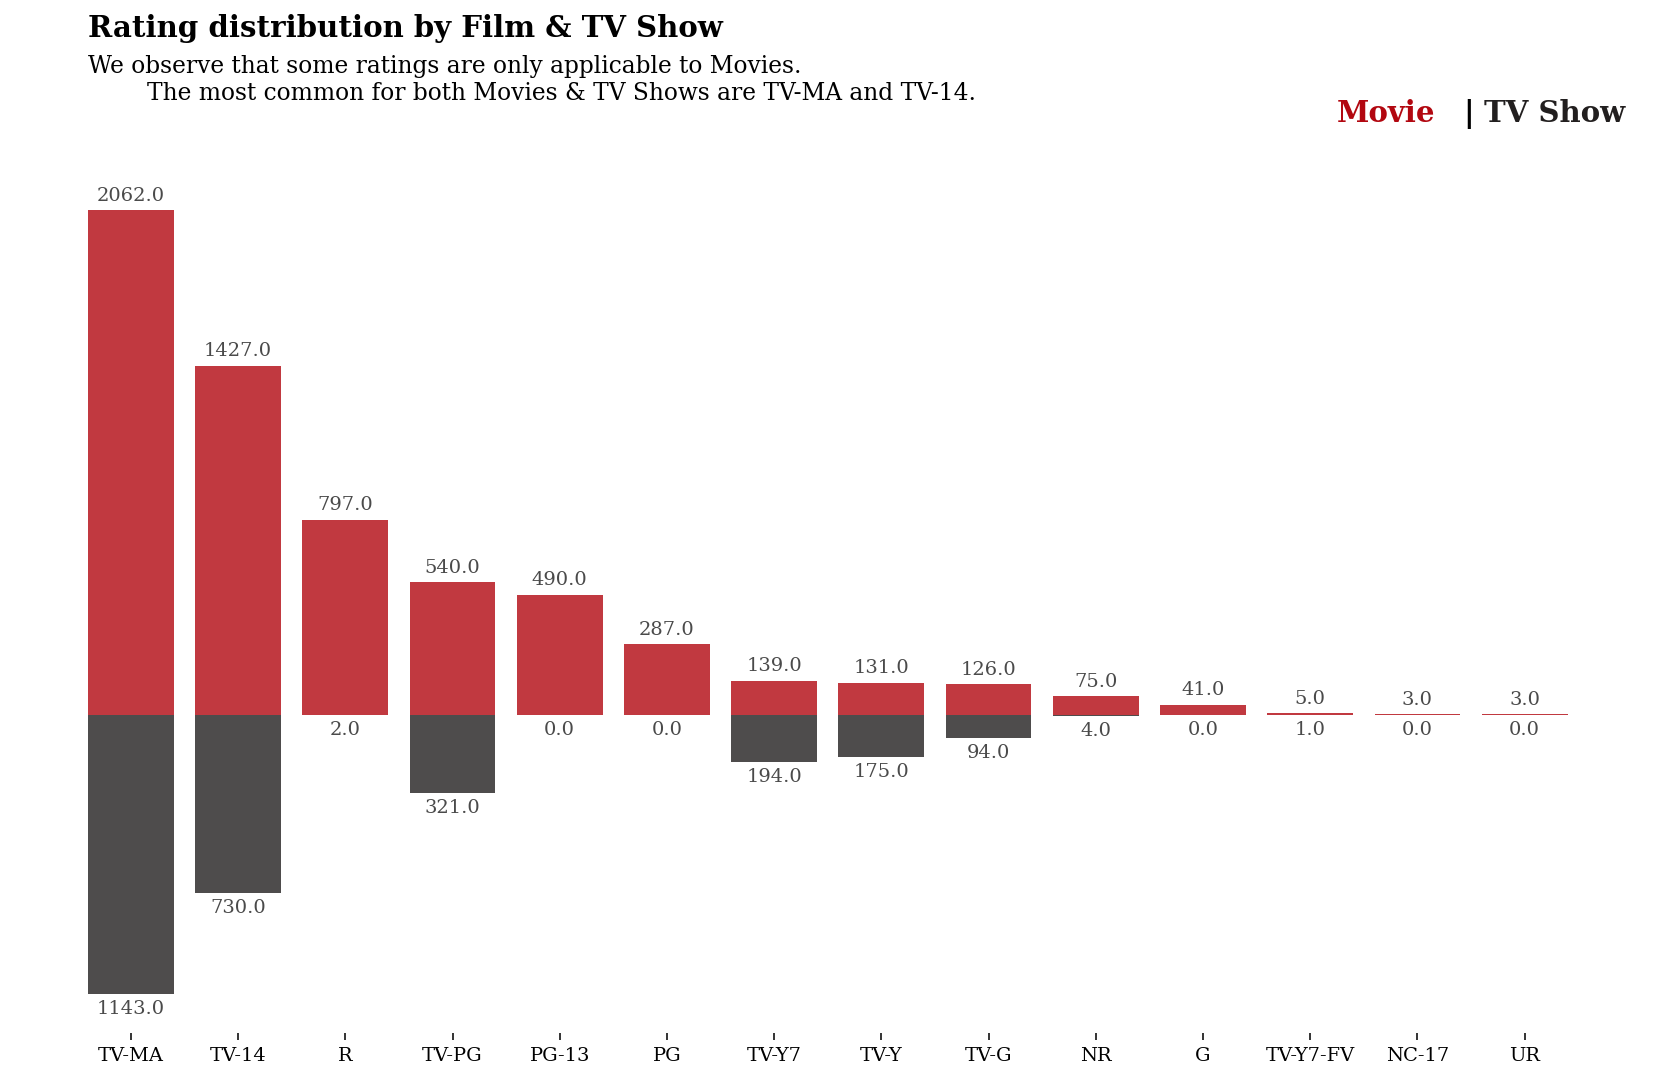

In [25]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.bar(data.index, movie, 
        color='#b20710', alpha=0.8, label='Movie')
ax.bar(data.index, tv, 
        color='#221f1f', alpha=0.8, label='TV Show')

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.92, 
        '''We observe that some ratings are only applicable to Movies. 
        The most common for both Movies & TV Shows are TV-MA and TV-14.
        '''
        , fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.755,0.924,"Movie",   fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|",       fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')


plt.show()

## Content Over Time

In [27]:
data  = df[['year_added','type']].groupby('year_added')['type'].value_counts().unstack().fillna(0)

print(data.columns)
print(data.index)
data.head(20)


Index(['Movie', 'TV Show'], dtype='object', name='type')
Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021],
      dtype='int32', name='year_added')


type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0


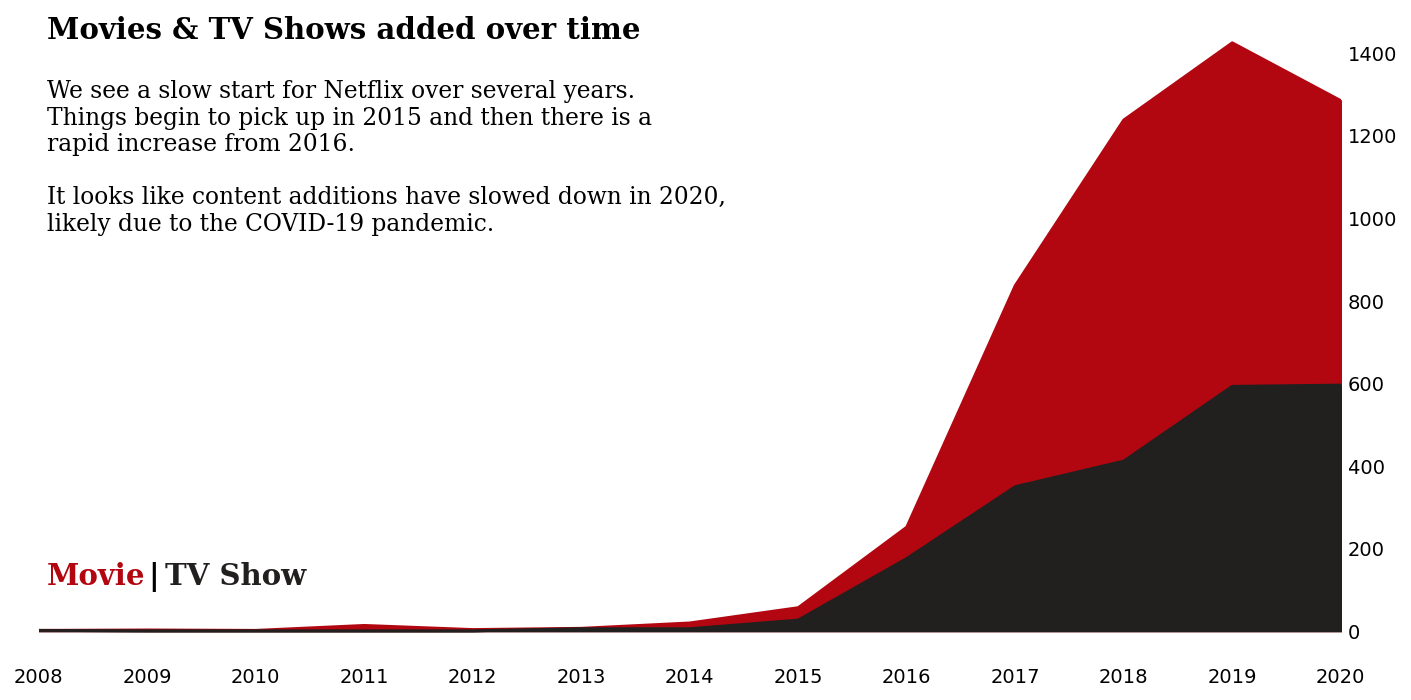

In [28]:
# Data for plots
color = ["#b20710", "#221f1f"]
mtv   = data.columns

# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(0,len(mtv)):
    ax.plot(data.index,data[mtv[i]], color=color[i])
    ax.fill_between(data.index, data[mtv[i]], color=color[i])

ax.yaxis.tick_right()
# ax.axhline(y = 0, color = 'black', linewidth = 1)

# #ax.set_ylim(0, 50)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))
ax.tick_params(axis=u'both', which=u'both',length=0)

# Text
fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

## Content Added by Month

In [30]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

data  = df[['month_added','month_name_added','type']].groupby('month_added')['type'].value_counts().unstack()
data.index = month_order

data.head(20)

type,Movie,TV Show
January,545,192
February,382,180
March,528,213
April,549,214
May,439,193
June,492,236
July,565,262
August,518,236
September,518,251
October,545,215


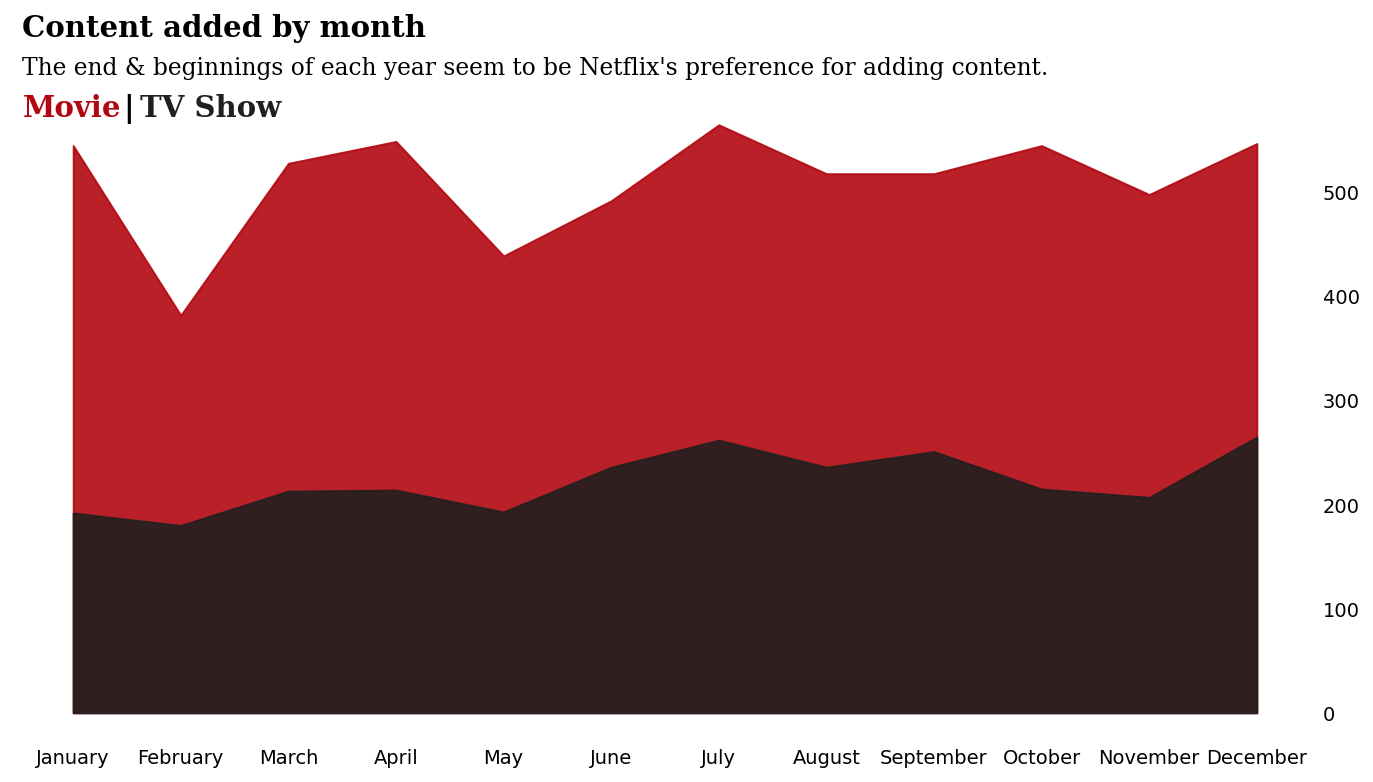

In [31]:
# Data for plots
color = ["#b20710", "#221f1f"]
mtv   = data.columns

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(0,len(mtv)):
    ax.fill_between(data.index, 0, data[mtv[i]], color=color[i], label=mtv,alpha=0.9)
    
ax.yaxis.tick_right()
# ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

# #ax.set_ylim(0, 50)
# #ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
# ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
# ax.margins(x=0) # remove white spaces next to margins

ax.tick_params(axis=u'both', which=u'both',length=0)

fig.text(0.13, 0.95, 'Content added by month', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

## Movie Genres 

### Note
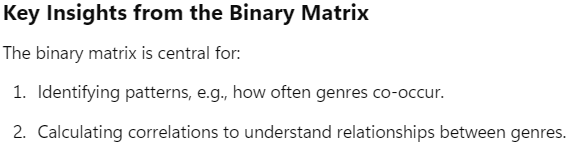

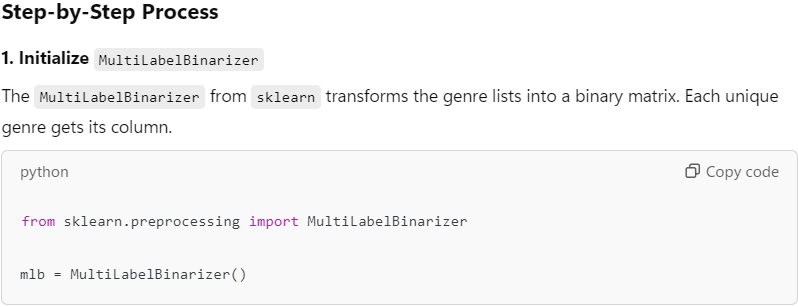
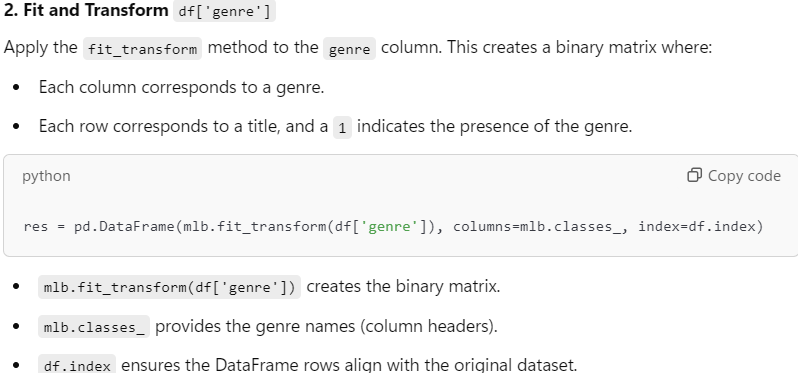
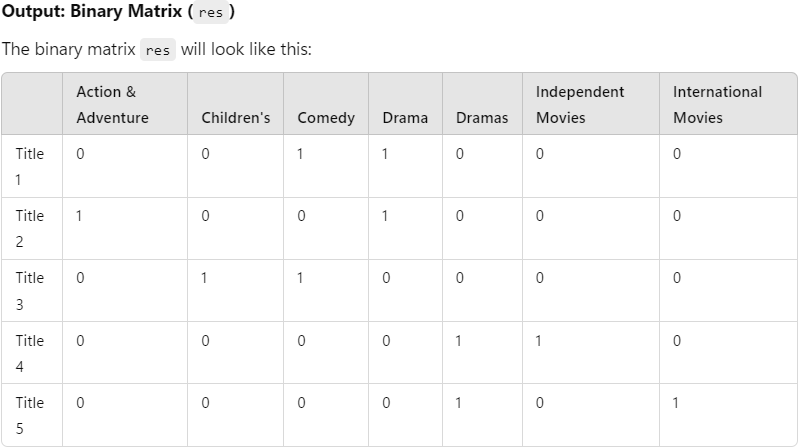
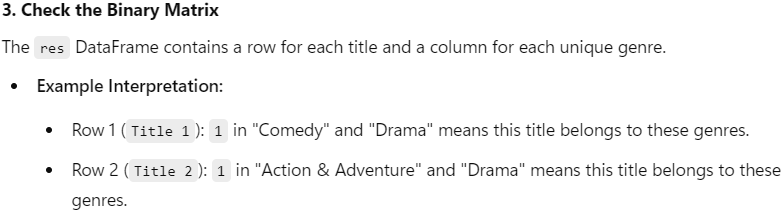
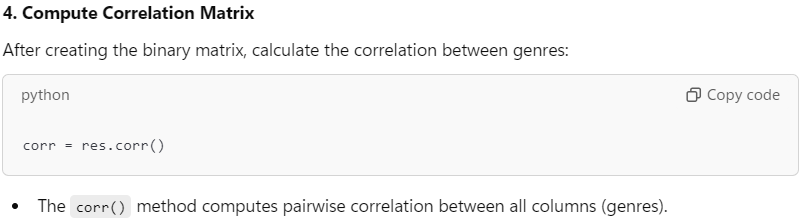
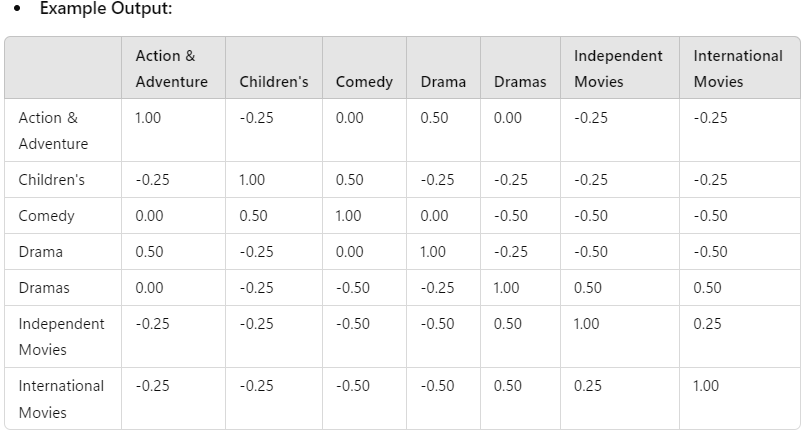
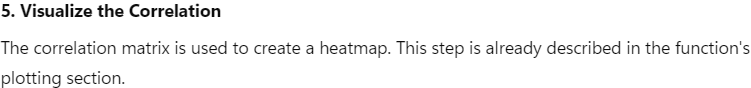
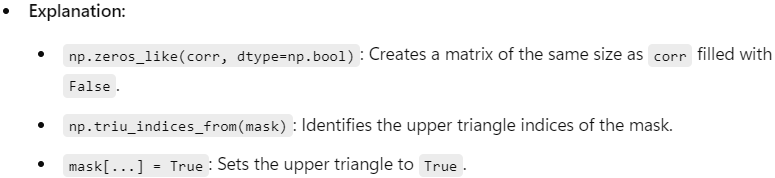
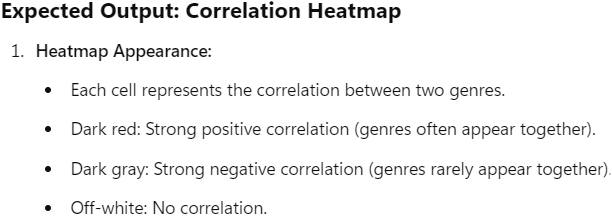

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

# Genre heatmap
def genre_heatmap(df, title):
    # Preprocessing
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

    # Add all genres to a single list
    Types = []
    for i in df['genre']: 
        Types += i

    # convert to a set for uniqeness
    Types = set(Types)    
    
    # Binary matrix & correlation
    test = df['genre']    
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Plots
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    sns.heatmap(
        corr,
        mask=mask,       # Apply the mask to hide the upper triangle
        cmap=cmap,       # Use the custom Netflix palette
        vmax=0.3,        # Set max value for normalization
        vmin=-0.3,       # Set min value for normalization
        center=0,        # Center around 0 for balanced coloring
        square=True,     # Keep the heatmap square-shaped
        linewidths=2.5   # Add space between cells for clarity
    )
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


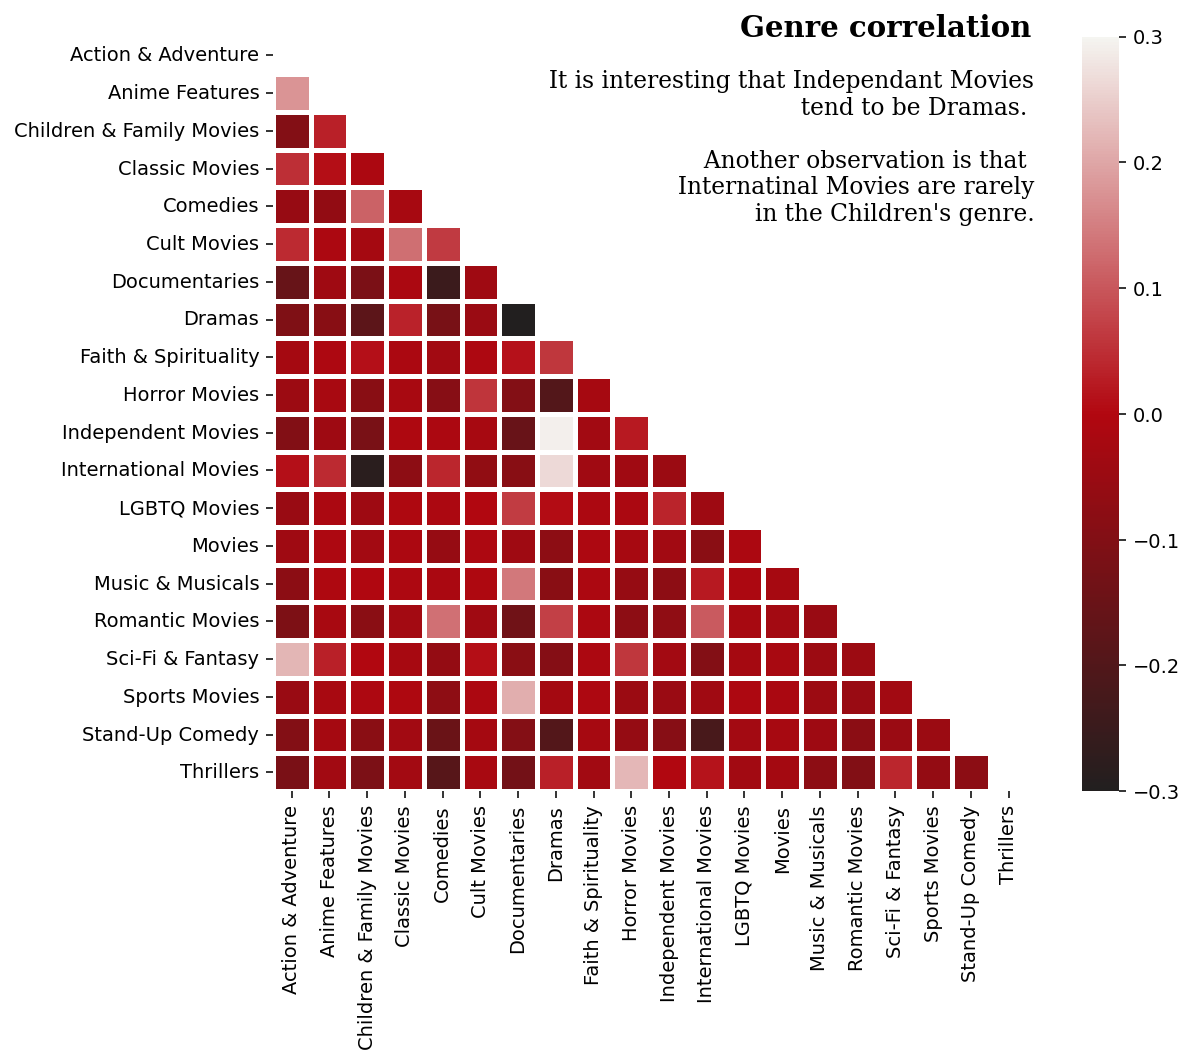

In [35]:
df_movies = df[df["type"] == "Movie"]

genre_heatmap(df_movies, 'Movie')

## Target Ages

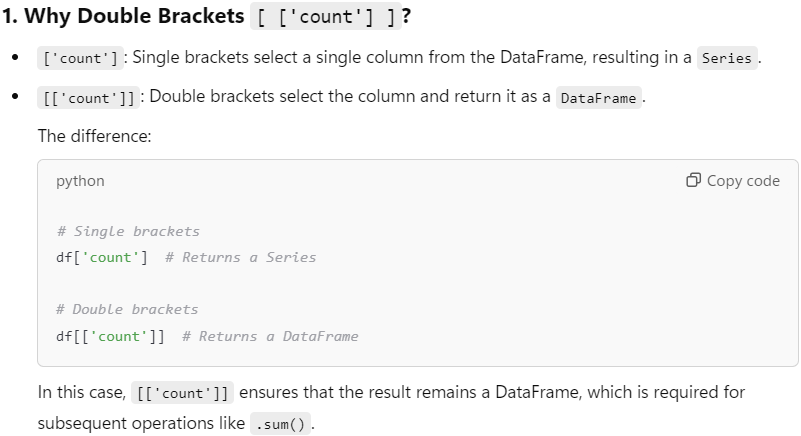

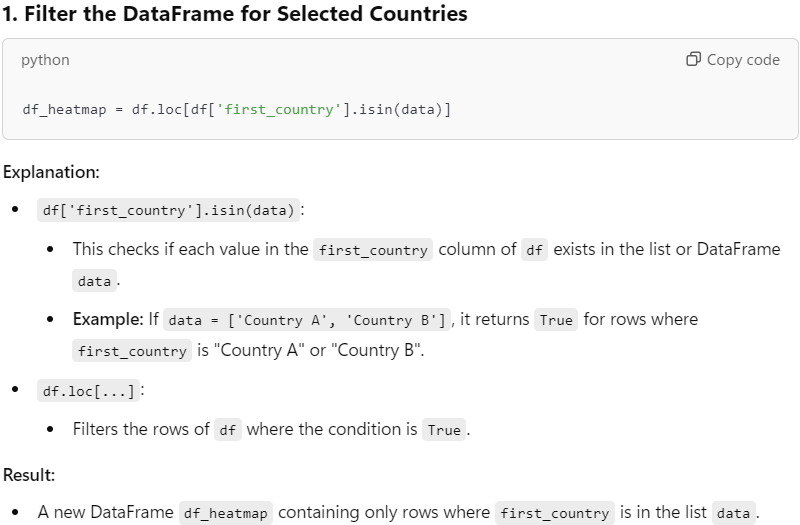
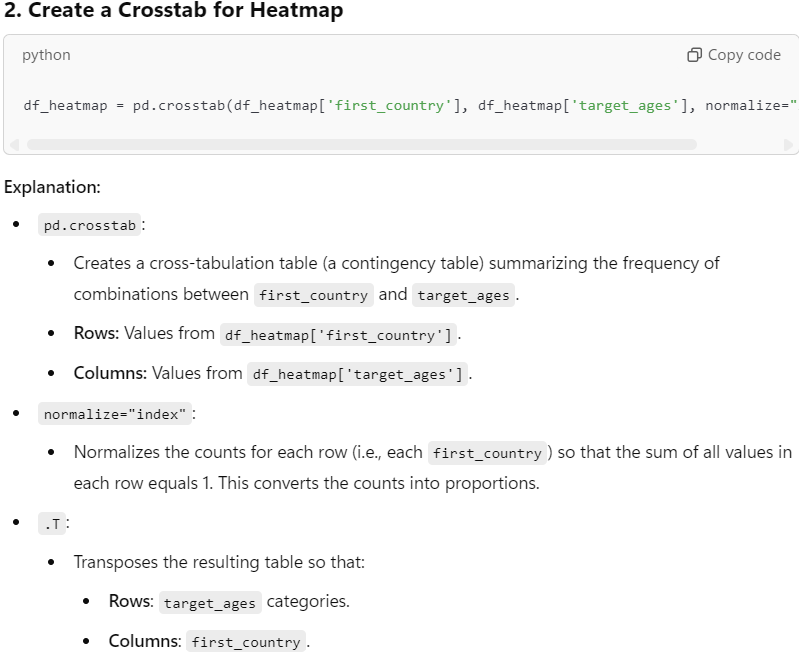
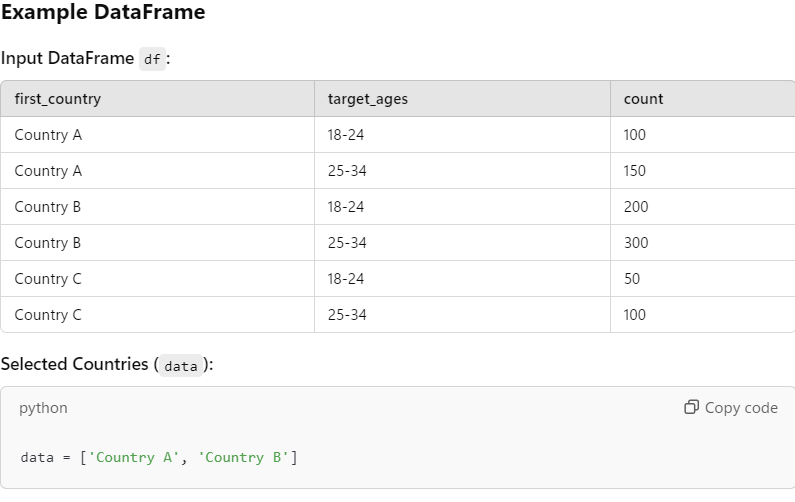
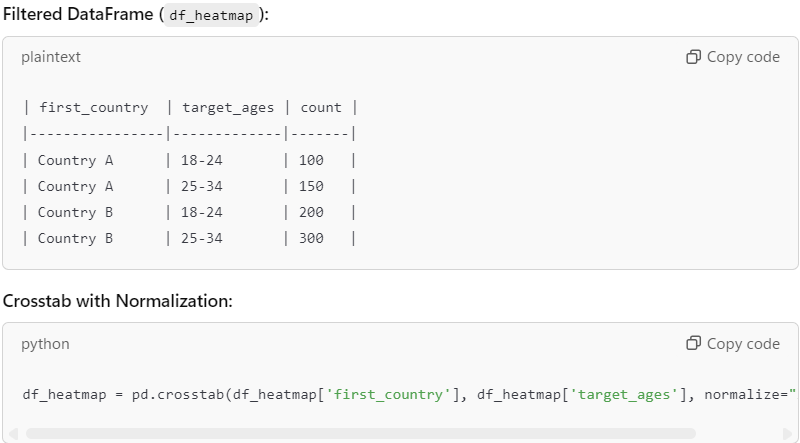
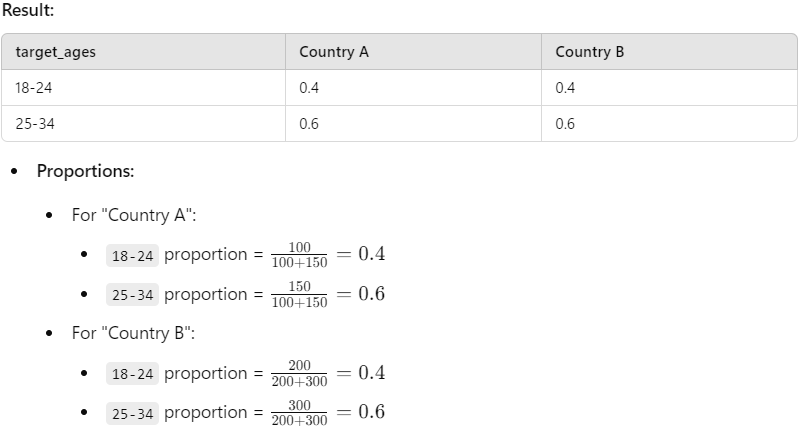

In [38]:
data  = df[['first_country','count']].groupby('first_country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
# print(data)
data  = data['first_country']
# print(data)

df_heatmap = df.loc[df['first_country'].isin(data)]
# print(df_heatmap)
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T
print(df_heatmap)

first_country  Australia    Canada    France     India     Japan    Mexico  \
target_ages                                                                  
Adults          0.460870  0.476015  0.622642  0.263889  0.354086  0.768657   
Kids            0.147826  0.143911  0.084906  0.013889  0.011673  0.014925   
Older Kids      0.234783  0.214022  0.103774  0.158730  0.256809  0.097015   
Teens           0.156522  0.166052  0.188679  0.563492  0.377432  0.119403   

first_country  S. Korea     Spain        UK       USA  
target_ages                                            
Adults         0.440758  0.817680  0.523126  0.457703  
Kids           0.042654  0.033149  0.081340  0.084346  
Older Kids     0.118483  0.044199  0.177033  0.200695  
Teens          0.398104  0.104972  0.218501  0.257256  


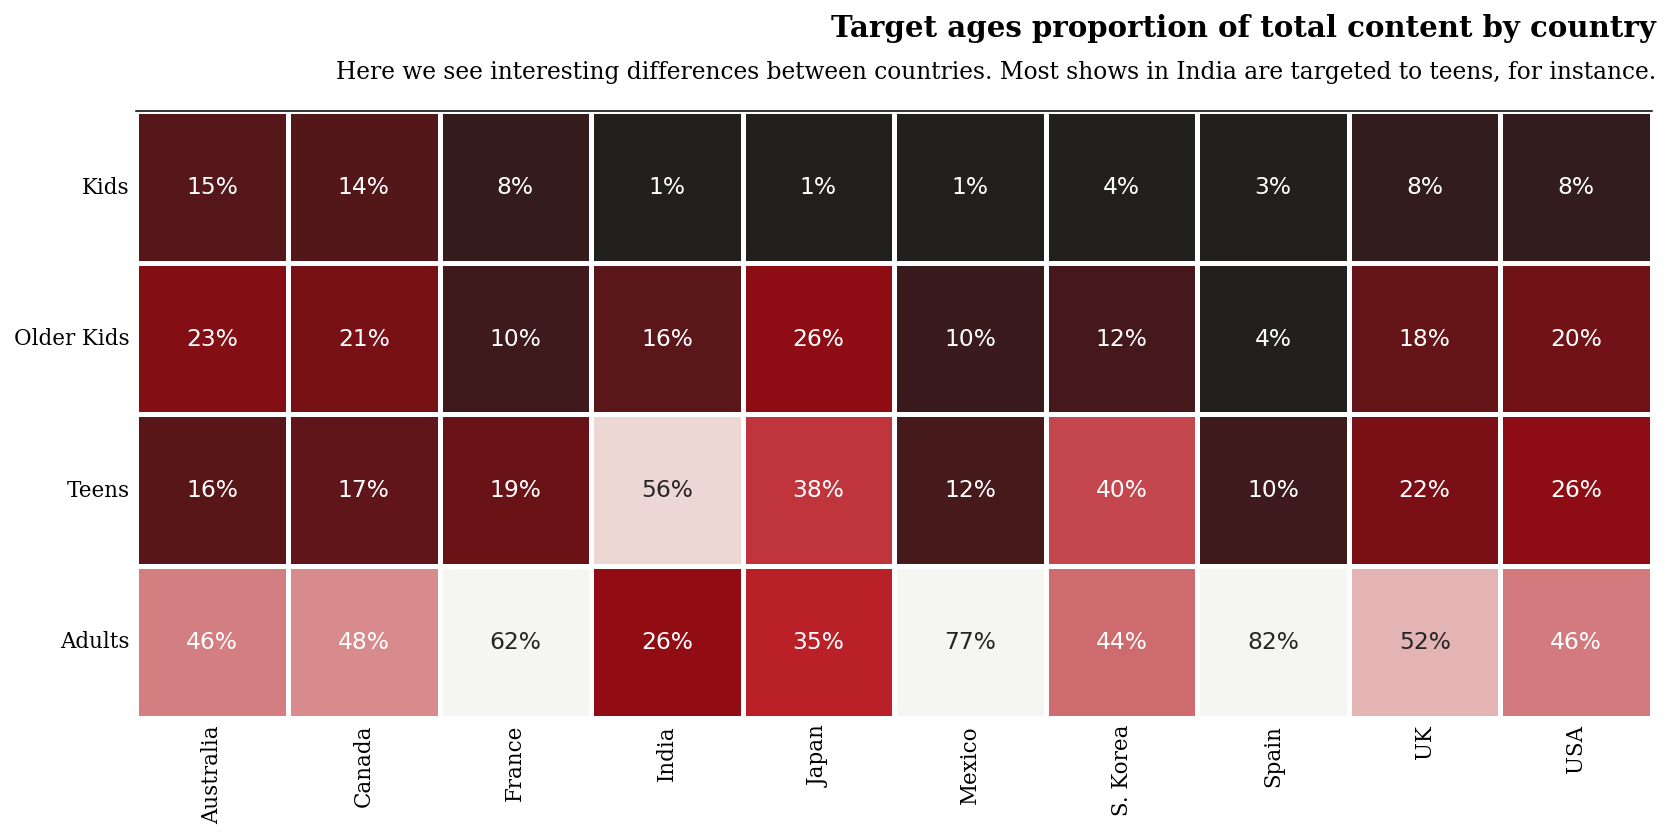

In [39]:
# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Fix the order
age_order = ['Kids','Older Kids','Teens','Adults']

# heatmap
sns.heatmap(df_heatmap.loc[age_order],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

# Text
fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

# Beautify it
ax.spines['top'].set_visible(True)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0,  fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()

plt.show()

## How Old are the Movies?

In [41]:
# Data
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
# df_movies.info()

# Correcting Datatype for Date
df_movies["year_added"] = pd.to_datetime(df_movies['year_added'],format="%Y")
df_tv["year_added"]     = pd.to_datetime(df_tv['year_added'],format="%Y")

# Relevant groupings
data = df_movies.groupby('first_country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]
# print(df_loli)
# df_loli.info()

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round().reset_index()

print(loli)

  first_country                  release_year                    year_added
0        Canada 2016-03-11 16:10:16.042780672 2018-07-11 06:48:07.700534784
1         Egypt 2007-09-04 02:41:37.959183616 2019-07-24 21:33:03.673469440
2        France 2014-11-07 19:17:50.270270208 2018-09-29 07:37:17.837837824
3         India 2011-06-27 01:03:41.359223296 2018-09-10 01:48:44.271844608
4         Japan 2013-09-11 03:23:17.647058944 2019-03-10 21:10:35.294117632
5        Mexico 2016-01-31 01:23:43.255813888 2018-04-08 13:57:12.558139648
6       Nigeria 2017-02-24 03:51:43.448275968 2019-10-26 03:02:04.137931008
7         Spain 2017-05-25 00:22:19.534883840 2018-06-11 07:04:11.162790656
8            UK 2013-06-10 05:43:02.198952960 2018-08-12 15:19:47.434554880
9           USA 2012-08-10 12:41:39.428571392 2018-12-11 19:08:24.000000000


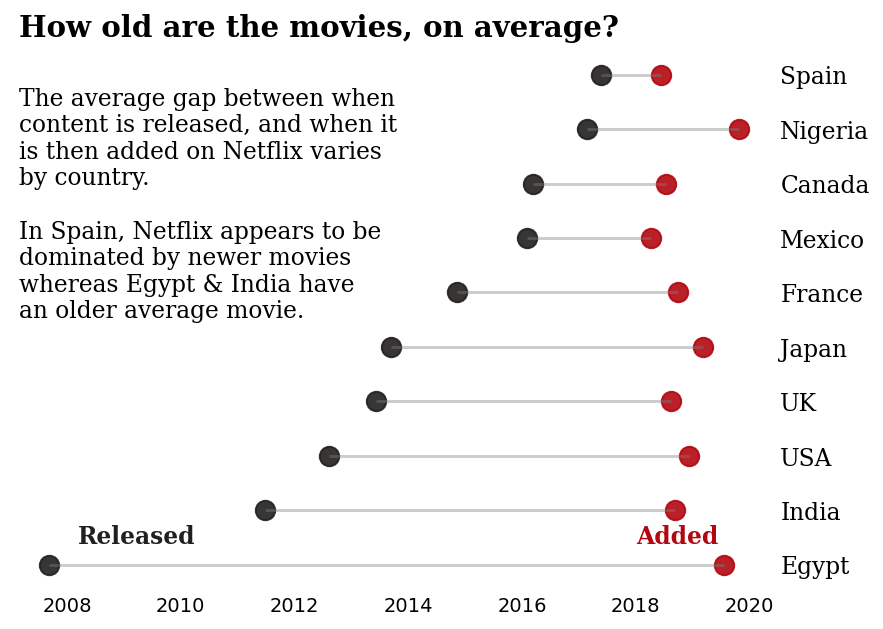

In [42]:
# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')
my_range=range(1,len(loli.index)+1)

# Plots
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9)
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)

# Y ticks
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.first_country)
plt.yticks(fontname = "serif",fontsize=12)

# Texts
fig.text(0.13, 0.9, 'How old are the movies, on average?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')
fig.text(0.13, 0.46,
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
        ''', fontsize=12, fontweight='light', fontfamily='serif')

#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

## How Old are the TV Shows?

In [44]:
# Data
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
# df_movies.info()

# Correcting Datatype for Date
df_movies["year_added"] = pd.to_datetime(df_movies['year_added'],format="%Y")
df_tv["year_added"]     = pd.to_datetime(df_tv['year_added'],format="%Y")

# Relevant groupings
data = df_tv.groupby('first_country')[['count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]
# print(df_loli)
# df_loli.info()

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round().reset_index()

print(loli)

  first_country                  release_year                    year_added
0     Australia 2013-04-06 10:13:46.229508096 2018-03-31 18:05:54.098360576
1        Canada 2016-03-11 16:10:16.042780672 2018-07-11 06:48:07.700534784
2        France 2014-11-07 19:17:50.270270208 2018-09-29 07:37:17.837837824
3         India 2011-06-27 01:03:41.359223296 2018-09-10 01:48:44.271844608
4         Japan 2013-09-11 03:23:17.647058944 2019-03-10 21:10:35.294117632
5      S. Korea 2017-05-05 00:30:38.297872384 2018-09-22 04:35:44.680850944
6         Spain 2017-05-25 00:22:19.534883840 2018-06-11 07:04:11.162790656
7        Taiwan 2017-12-31 16:00:00.000000000 2019-09-25 20:48:00.000000000
8            UK 2013-06-10 05:43:02.198952960 2018-08-12 15:19:47.434554880
9           USA 2012-08-10 12:41:39.428571392 2018-12-11 19:08:24.000000000


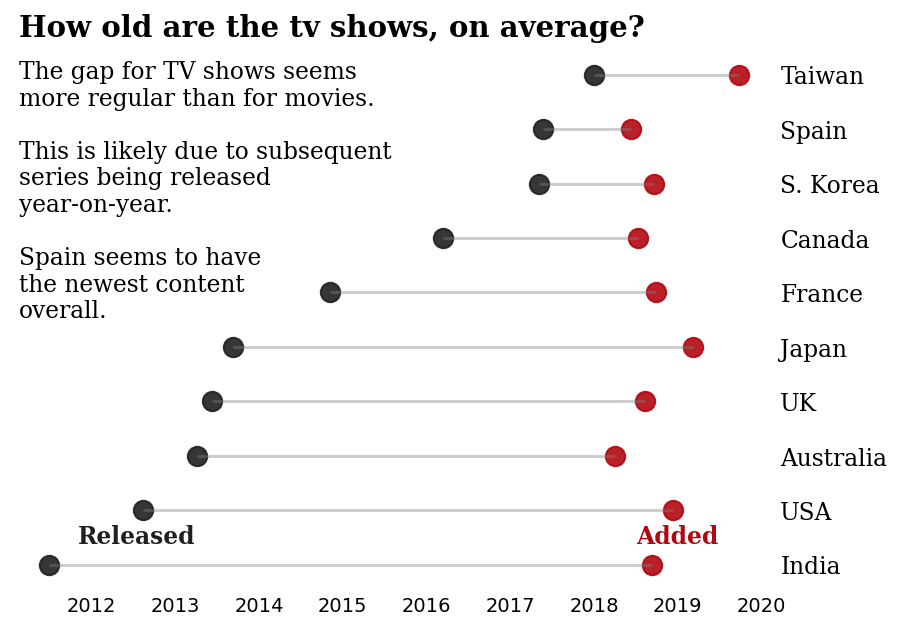

In [45]:
# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')
my_range=range(1,len(loli.index)+1)

# Plots
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9)
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9)

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)

# Y ticks
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.first_country)
plt.yticks(fontname = "serif",fontsize=12)

# Texts
fig.text(0.13, 0.9, 'How old are the tv shows, on average?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')
fig.text(0.13, 0.46,
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
''', fontsize=12, fontweight='light', fontfamily='serif')

#plt.xlabel('Year')
#plt.ylabel('Country')
plt.show()

## USA & India
As the two largest content countries, it might be fun to compare the two

In [98]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]
print("Content in USA & India / Content in All Countries = {}%".format(round(len(us_ind)/len(df)*100,1)))

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].T
print(data_sub)

# data_sub.columns

Content in USA & India / Content in All Countries = 57.3%
first_country    USA  India
year_added                 
2008             2.0    0.0
2009             1.0    0.0
2010             1.0    0.0
2011            12.0    0.0
2012             3.0    0.0
2013            10.0    0.0
2014            19.0    0.0
2015            57.0    0.0
2016           196.0   11.0
2017           467.0  153.0
2018           621.0  339.0
2019           926.0  212.0
2020           818.0  193.0
2021           898.0  100.0


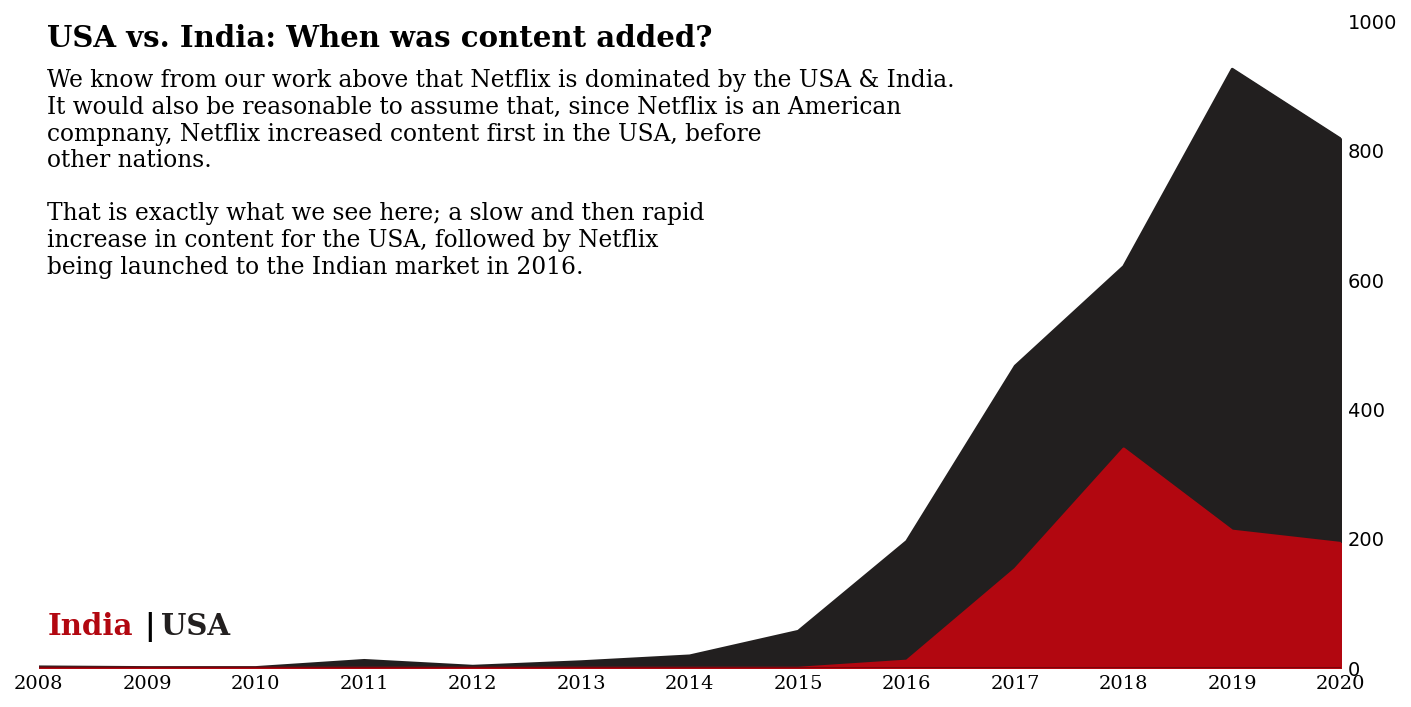

In [102]:
# Data for plots
color = ['#221f1f', '#b20710','#f5f5f1']
mtv   = data_sub.columns

# Plots
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

for i in range(0,len(mtv)):
    ax.plot(data_sub.index,data_sub[mtv[i]], color=color[i])
    ax.fill_between(data_sub.index, 0, data_sub[mtv[i]], color=color[i])
    
ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)
#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins
ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))
ax.tick_params(axis=u'both', which=u'both',length=0)

# Text
fig.text(0.13, 0.85, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''
We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
compnany, Netflix increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

## Wordcloud of Netflix Titiles

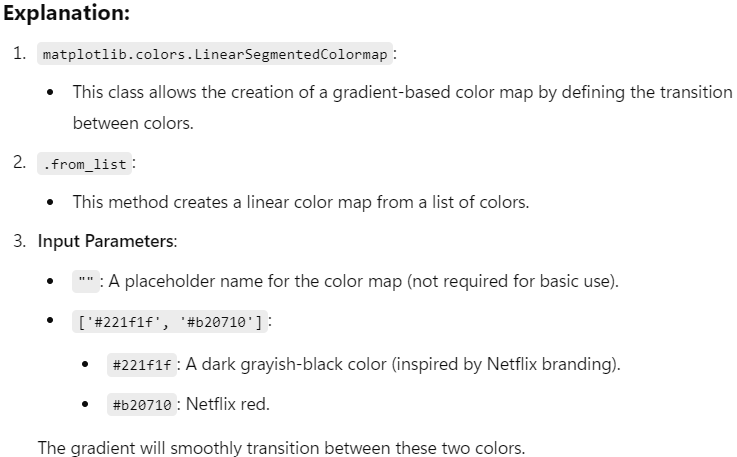
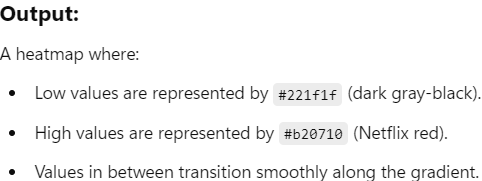

In [121]:
# importing modules 
from PIL import Image
import requests

url = 'https://cdn4.iconfinder.com/data/icons/logos-and-brands/512/227_Netflix_logo-512.png'

img = Image.open(requests.get(url, stream=True).raw)
img.show()

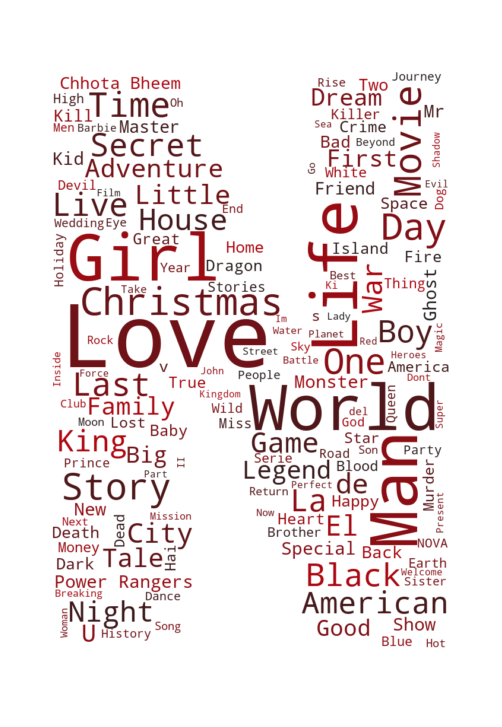

In [163]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import requests

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# Titles
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Netflix icon image
url = 'https://p1.hiclipart.com/preview/889/950/420/netflix-icon-cinema-and-tv-logos-icon-red-material-property-rectangle-png-clipart.jpg'
mask = np.array(Image.open(requests.get(url, stream=True).raw))

# Wordcloud
wordcloud = WordCloud(
    background_color='white',     # White background for clarity.
    width=500,                    # Width of the WordCloud.
    height=200,                   # Height of the WordCloud.
    colormap=cmap,                # Custom color map for styling.
    max_words=150,                # Limit the WordCloud to 150 words.
    mask=mask,                     # Use the Netflix icon as the mask.
).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()